In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Bai tap AI Samsung co ban/Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


**Câu 1: Tính các sai số MAE,MSE,R^2**

MAE is: 2.8031548786227867
MSE is: 13.53803733058648
R^2 is: 0.8093837827628411


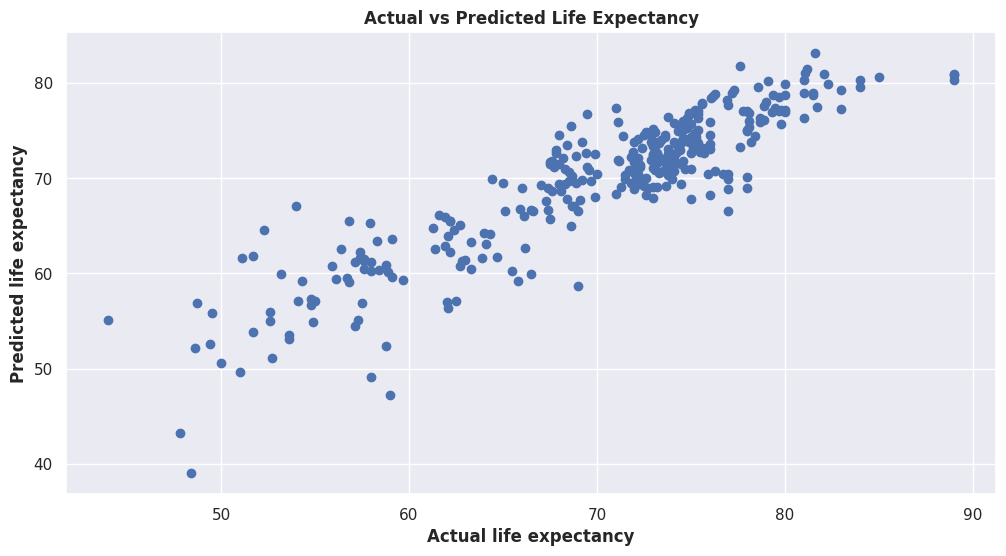

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

X = data.drop(columns = ['Life expectancy','Country','Year','Status'],axis = 1)
y = data['Life expectancy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE is:",mae)
print("MSE is:",mse)
print("R^2 is:",r2)

sns.set(style = "darkgrid")
plt.figure(figsize = (12,6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual life expectancy',fontweight = "bold")
plt.ylabel('Predicted life expectancy',fontweight = "bold")
plt.title('Actual vs Predicted Life Expectancy',fontweight = "bold")
plt.show()






**2. So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = data.drop(columns = ['Life expectancy','Country','Year','Status'],axis = 1)
y = data['Life expectancy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE is:",mae)
print("MSE is:",mse)
print("R^2 is:",r2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
model_scaler = LinearRegression()
model_scaler.fit(X_train_scaler,y_train)
y_scaler_pred = model.predict(X_test)
mae_scaler = mean_absolute_error(y_test,y_scaler_pred)
mse_scaler = mean_squared_error(y_test,y_scaler_pred)
r2_scaler = r2_score(y_test,y_scaler_pred)
print("MAE Scaler is:",mae_scaler)
print("MSE Scaler is:",mse_scaler)
print("R^2 Scaler is:",r2_scaler)

print("\nComparison of evaluation metrics:")
print(f"{'Mean Absolute Error (MAE)':<25} {mae:<15} {mae_scaler:<15}")
print(f"{'Mean Squared Error (MSE)':<25} {mse:<15} {mse_scaler:<15}")
print(f"{'R-squared (R^2)':<25}{r2:<15} {r2_scaler:<15}")






MAE is: 2.8031548786227867
MSE is: 13.53803733058648
R^2 is: 0.8093837827628411
MAE Scaler is: 2.8031548786227867
MSE Scaler is: 13.53803733058648
R^2 Scaler is: 0.8093837827628411

Comparison of evaluation metrics:
Mean Absolute Error (MAE) 2.8031548786227867 2.8031548786227867
Mean Squared Error (MSE)  13.53803733058648 13.53803733058648
R-squared (R^2)          0.8093837827628411 0.8093837827628411


**3. Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = data.drop(columns = ['Life expectancy','Country','Year','Status'],axis = 1)
y = data['Life expectancy']
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
cv_mae = -cross_val_score(model,X_train,y_train,cv = 10,scoring = 'neg_mean_absolute_error')
cv_mse = -cross_val_score(model,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error')
cv_r2 = cross_val_score(model,X_train,y_train,cv = 10,scoring = 'r2')

print("Cross Validation in MAE: ",cv_mae.mean())
print("Cross Validation in MSE: ",cv_mse.mean())
print("Cross Validation in R^2: ",cv_r2.mean())




Cross Validation in MAE:  2.7809022312356455
Cross Validation in MSE:  13.109821586801587
Cross Validation in R^2:  0.8299840332059354


**4. Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030**

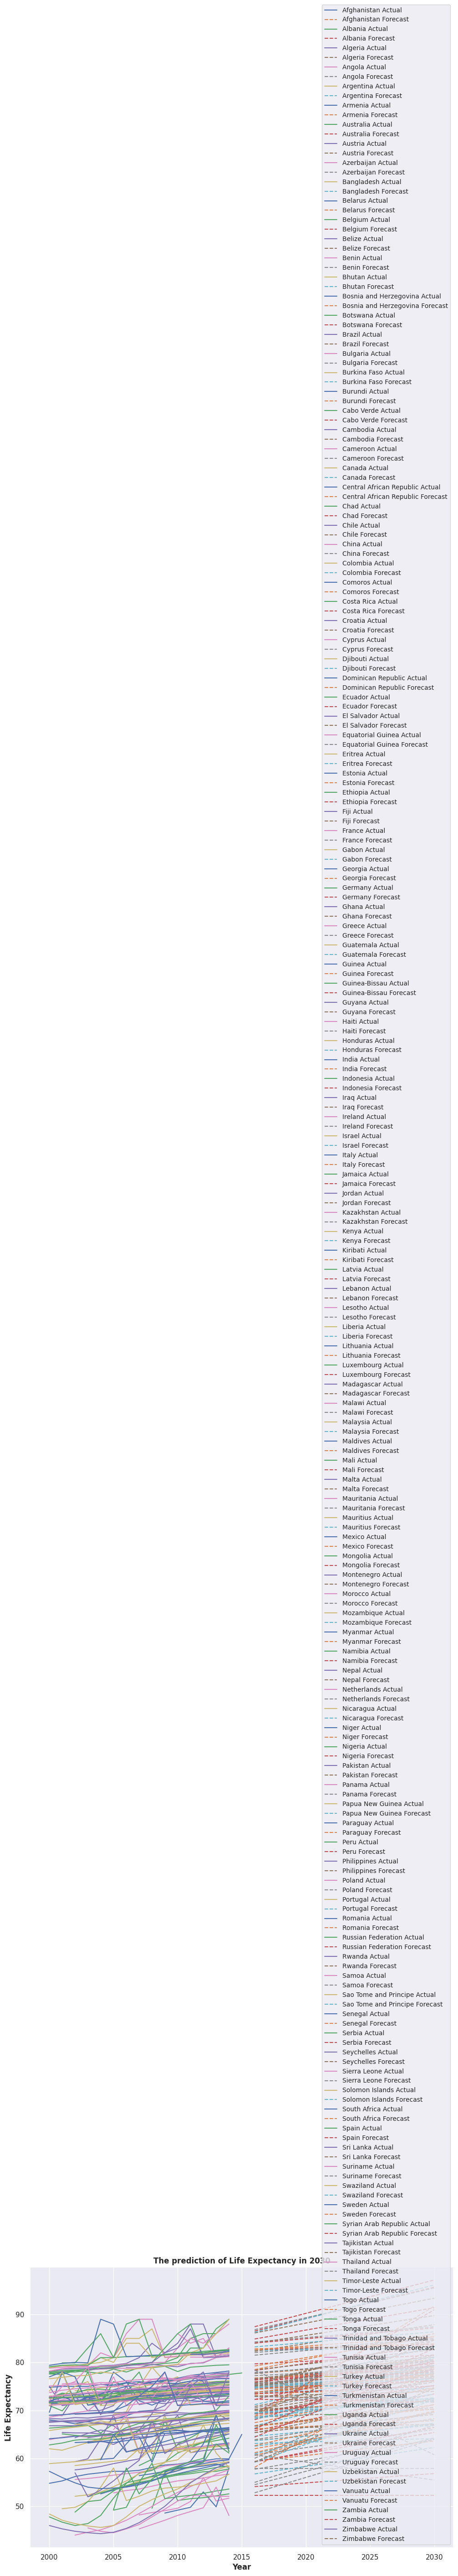

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

data = data.dropna(subset = ['Life expectancy'])
data['Year'] = pd.to_datetime(data['Year'],format = "%Y")

models = {}
countries = data['Country'].unique()
for country in countries:
  country_data = data[data['Country'] == country]
  X = country_data['Year'].dt.year.values.reshape(-1, 1)
  y = country_data['Life expectancy']

  model = LinearRegression()
  model.fit(X,y)
  models[country] = model

future_years = np.arange(data['Year'].dt.year.max() + 1, 2031).reshape(-1, 1)
predictions = {}
for country,model in models.items():
  predictions[country] = model.predict(future_years)

sns.set(style = "darkgrid")
plt.figure(figsize = (12,8))
for country in countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'].dt.year, country_data['Life expectancy'], label=f'{country} Actual')
    plt.plot(future_years, predictions[country], linestyle='--', label=f'{country} Forecast')

plt.xlabel('Year',fontweight = "bold")
plt.ylabel('Life Expectancy',fontweight = "bold")
plt.title("The prediction of Life Expectancy in 2030",fontweight = "bold")
plt.legend(loc = 'lower right',fontsize = 10)
plt.show()